<a href="https://colab.research.google.com/github/Romilsonlonan/ecommerce/blob/main/ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

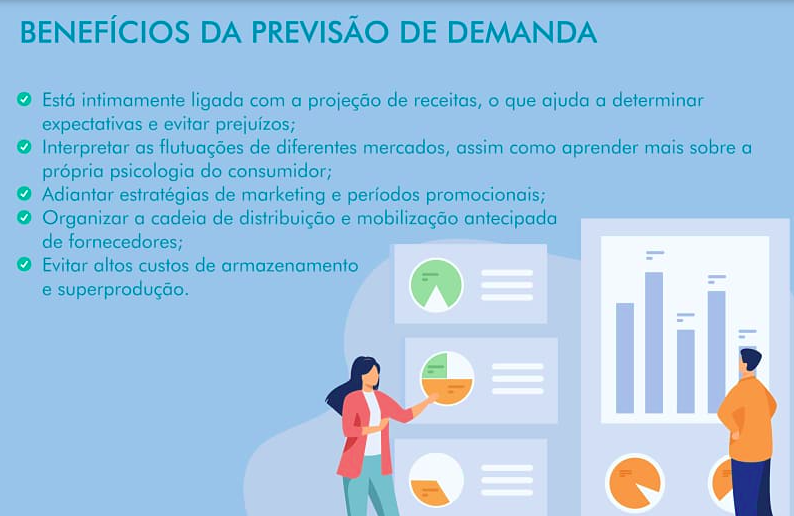

---
# Pré-Processamento de Dados
---

## Nesta etapa, estamos preparando e organizando os dados para análises posteriores, realizando tarefas como leitura dos dados, verificação da estrutura, tratamento de valores ausentes, renomeação de colunas, cálculos estatísticos iniciais, entre outras ações necessárias para tornar os dados adequados e utilizáveis para as análises ou modelagem que pretendemos realizar

In [1]:
# importando as bibliotecas

import pandas as pd # O módulo pandas é uma biblioteca de código aberto para análise de dados e aprendizado de máquina
import matplotlib.pyplot as plt # O módulo matplotlib.pyplot é uma biblioteca que fornece uma variedade de funções para criar gráficos e diagramas.
import seaborn as sns # O módulo seaborn é uma biblioteca para visualização de dados estatísticos em Python com uma variedade de funções para criar gráficos e diagramas de alta qualidade.

In [2]:
# Lê um arquivo Excel chamado ecommerce.xlsx e cria um DataFrame pandas chamado df com os argumentos:

# O argumento ***decimal*** especifica o separador decimal usado no arquivo Excel. No caso, o separador decimal é um ponto (.).
# O argumento ***header*** especifica a linha do arquivo Excel que contém os cabeçalhos das colunas. No caso, a linha 0 contém os cabeçalhos das colunas.
# O argumento ***index_col*** especifica a coluna que será usada como índice do DataFrame. No caso, nenhuma coluna será usada como índice
# O argumento ***na_values*** especifica os valores que serão considerados como valores ausentes no arquivo Excel. No caso, nenhum valor será considerado como valor ausente.
# O argumento ***parse_dates*** especifica as colunas que serão convertidas em datas no DataFrame. No caso, a coluna Data da Venda será convertida em uma data
df = pd.read_excel("/content/ecommerce.xlsx",
                   decimal=".",
                   header=0,
                   index_col=None,
                   na_values=False,
                   parse_dates=["Data da Venda"]
                   )

In [3]:
# O método head() é usado para retornar as 5 primeiras linhas de um DataFrame
df.head(2) # O argumento 2 especifica o número de linhas que devem ser retornadas.

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,Localidade,Unnamed: 9
0,2017-06-01 00:00:00,Sistema de Som 7.1 Channel X711 Prata,Sistema de Som,1109.00,367.43,Litware,1.0,"Pinheiro, Vicente",França - Europa,NaN
1,2017-06-01 00:00:00,180 CFM Ventilador de Coluna X450 Preto,Ventiladores,215.62,71.44,Litware,1.0,"Lopez, Marlon",Estados Unidos - América do Norte,NaN


In [4]:
# O método tail() é usado para retornar as últimas 5 linhas de um DataFrame.
df.tail(2) # O argumento 2 especifica o número de linhas que devem ser retornadas.

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,Localidade,Unnamed: 9
203886,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203887,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# O método shape() retorna a forma(tupla) de dois elementos do DataFrame df com as quantidades de linhas e colunas
df.shape

(203888, 10)

In [7]:
''' O método info() retorna informações sobre o DataFrame df. Essas informações incluem o número de linhas, o número de
colunas, os tipos de dados das colunas, os valores não nulos e a memória usada pelo DataFrame.'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203888 entries, 0 to 203887
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Data da Venda   203888 non-null  object 
 1   Produto         203882 non-null  object 
 2   Categoria       203882 non-null  object 
 3   PrecoUnitario   203882 non-null  float64
 4   Custo Unitário  203882 non-null  float64
 5   Marca           203882 non-null  object 
 6   Qtd. Vendida    203882 non-null  float64
 7   Nome Cliente    203882 non-null  object 
 8   Localidade      203882 non-null  object 
 9   Unnamed: 9      2 non-null       object 
dtypes: float64(3), object(7)
memory usage: 15.6+ MB


---
# Tratamento de dados ausentes
---

## É o processo de identificar e corrigir valores ausentes em um conjunto de dados. Os dados ausentes podem ocorrer por uma variedade de razões, como erro humano, perda de dados ou dados incompletos. O tratamento de dados ausentes é importante para garantir a integridade e a precisão de um conjunto de dados.

<Axes: >

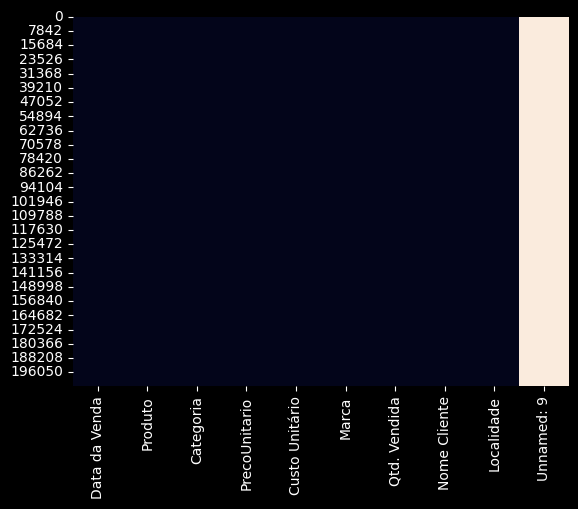

In [13]:
# Mapa de calor dos valores ausentes no DataFrame

# O método sns.heatmap() é uma função do módulo seaborn que cria um mapa de calor de uma matriz ou DataFrame.
sns.heatmap(df.isnull(), cbar=False) # O argumento cbar=False especifica que não deve haver barra de cores no mapa de calor

In [15]:
# retorna um Series com o número de valores ausentes em cada coluna do DataFrame df.
df.isnull().sum()

Data da Venda          0
Produto                6
Categoria              6
PrecoUnitario          6
Custo Unitário         6
Marca                  6
Qtd. Vendida           6
Nome Cliente           6
Localidade             6
Unnamed: 9        203886
dtype: int64

In [14]:
'''O método ***isnull()*** é um método da classe DataFrame do Pandas que retorna um DataFrame com valores booleanos,
onde True representa um valor ausente e False representa um valor não ausente.'''

enulo = df.isnull()
enulo.head(2)

,Data da Venda,Produto,Categoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Nome Cliente,Localidade,Unnamed: 9
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True


In [16]:
''' Realizando um ***for*** loop com a palavra chave ***in*** que itera sobre cada coluna do DataFrame df e calcula o percentual
de dados faltantes na coluna

-> A variável coluna é inicializada com a primeira coluna do DataFrame df.
-> O método isnull() é usado para retornar um DataFrame com valores booleanos, onde True representa um valor ausente e False representa um valor não ausente.
-> O método sum() é usado para retornar o número de valores ausentes na coluna.
-> O método len() é usado para retornar o número de linhas na coluna.
-> O resultado dos métodos sum() e len() é dividido por 100 para obter o percentual de dados faltantes na coluna.

'''

for coluna in df.columns:
    faltantes_percentual = (df[coluna].isnull().sum() / len(df[coluna])) * 100
    print(f"Percentual de dados faltantes na coluna {coluna}: {round(faltantes_percentual, 3)}%")

Percentual de dados faltantes na coluna Data da Venda: 0.0%
Percentual de dados faltantes na coluna Produto: 0.003%
Percentual de dados faltantes na coluna Categoria: 0.003%
Percentual de dados faltantes na coluna PrecoUnitario: 0.003%
Percentual de dados faltantes na coluna Custo Unitário: 0.003%
Percentual de dados faltantes na coluna Marca: 0.003%
Percentual de dados faltantes na coluna Qtd. Vendida: 0.003%
Percentual de dados faltantes na coluna Nome Cliente: 0.003%
Percentual de dados faltantes na coluna Localidade: 0.003%
Percentual de dados faltantes na coluna Unnamed: 9: 99.999%


In [17]:
# o método fillna() para preencher os valores ausentes
# O method ffill é um método que preenche os valores ausentes com o valor anterior na coluna considerando a visinhança dos dados
df.fillna(method="ffill", inplace=True)

# Verificando o status de dados faltantes em cada coluna
missing_data = df.isnull().sum()

# Exibindo o status de dados faltantes por coluna
print("Status de Dados Faltantes por Coluna:")
print(missing_data)

Status de Dados Faltantes por Coluna:
Data da Venda          0
Produto                0
Categoria              0
PrecoUnitario          0
Custo Unitário         0
Marca                  0
Qtd. Vendida           0
Nome Cliente           0
Localidade             0
Unnamed: 9        175232
dtype: int64


---
## Observação: 👁️👁️
---

A coluna Unnamed: 9 não teve seus dados ausentes preenchidos com o método fillna() porque o método fillna() só preenche valores ausentes com o valor anterior na coluna. A coluna Unnamed: 9 não tem um valor anterior para preencher os valores ausentes.

Para preencher os valores ausentes na coluna Unnamed: 9, você pode usar o método fillna() com um valor diferente. Por exemplo, você pode usar o seguinte código para preencher os valores ausentes com o valor 0:

df.fillna(0, inplace=True)

Como a coluna Unnamed: 9 não é essencial para o conjunto de dados, ela pode ser removida.